**Installing dependencies**

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.visualization import circuit_drawer
from qiskit import assemble
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_state_hinton, plot_state_paulivec, plot_state_qsphere
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit_aer import AerSimulator

**Quantum Teleportation**

In [5]:
class QuantumTeleportation:
    def __init__(self):
        self.qr = QuantumRegister(3, name="q")
        self.crz = ClassicalRegister(1, name="crz")
        self.crx = ClassicalRegister(1, name="crx")
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator = AerSimulator()
        self.result = None

    def create_bell_pair(self, qc, a, b):
        """Creates a Bell pair using qubits a & b"""
        qc.h(a)  # Put qubit a into state |+>
        qc.cx(a, b)  # CNOT with a as control and b as target
        return qc

    def alice_gates(self, qc, psi, a):
        """Applies Alice's gates"""
        qc.cx(psi, a)
        qc.h(psi)
        return qc

    def measure_and_send(self, qc, a, b):
        """Measures qubits a & b and 'sends' the results to Bob"""
        qc.barrier()
        qc.measure(a, 0)
        qc.measure(b, 1)
        return qc

    def bob_gates(self, qc, qubit):
        """Applies Bob's gates based on classical register values"""
        qc.x(qubit).c_if(self.crx, 1)  # Apply X gate if crx is 1
        qc.z(qubit).c_if(self.crz, 1)  # Apply Z gate if crz is 1
        return qc

    def prepare_circuit(self):
        """Prepares the teleportation circuit with measurements"""
        qc = QuantumCircuit(self.qr, self.crz, self.crx)
        qc = self.create_bell_pair(qc, 1, 2)
        qc.barrier()  # Use barrier to separate steps
        qc = self.alice_gates(qc, 0, 1)
        qc = self.measure_and_send(qc, 0, 1)
        qc.barrier()  # Use barrier to separate steps
        qc = self.bob_gates(qc, 2)
        return qc

    def prepare_circuit1(self):
        """Prepares the teleportation circuit without measurements"""
        qc1 = QuantumCircuit(self.qr)
        qc1 = self.create_bell_pair(qc1, 1, 2)
        qc1.barrier()  # Use barrier to separate steps
        qc1 = self.alice_gates(qc1, 0, 1)
        qc1.barrier()  # Use barrier to separate steps
        #qc1 = self.bob_gates(qc1, 2)
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        transpiled_qc = transpile(self.qc1, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def get_counts(self):
        """Retrieve measurement counts from the result"""
        if hasattr(self, 'result'):
            counts = self.result.get_counts(self.qc)
            return counts
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)  # Ensure correct method for statevector creation
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [6]:
simulator = QuantumTeleportation()
simulator.run_simulation()

<ipython-input-5-c790356c0bb2>:32: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(self.crx, 1)  # Apply X gate if crx is 1
<ipython-input-5-c790356c0bb2>:33: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(self.crz, 1)  # Apply Z gate if crz is 1


**Counts**

In [7]:
simulator.get_counts()

{'0 1': 279, '1 0': 244, '0 0': 252, '1 1': 249}

**Running simuation wihout measurements**

In [8]:
simulator.run_simulation1()

**Density matrix**

In [9]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

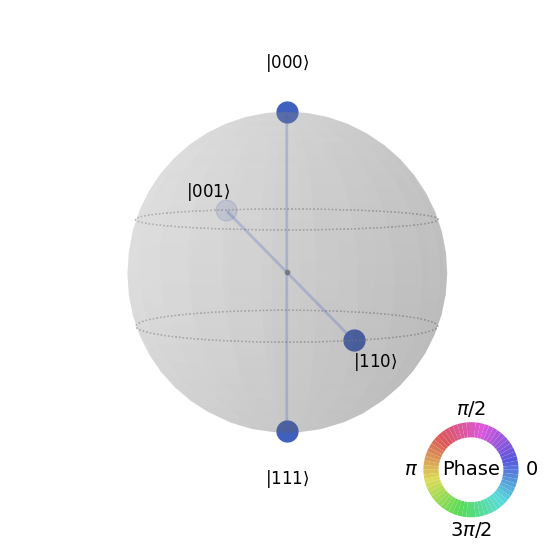

In [10]:
simulator.get_qsphere()

**City Representation**

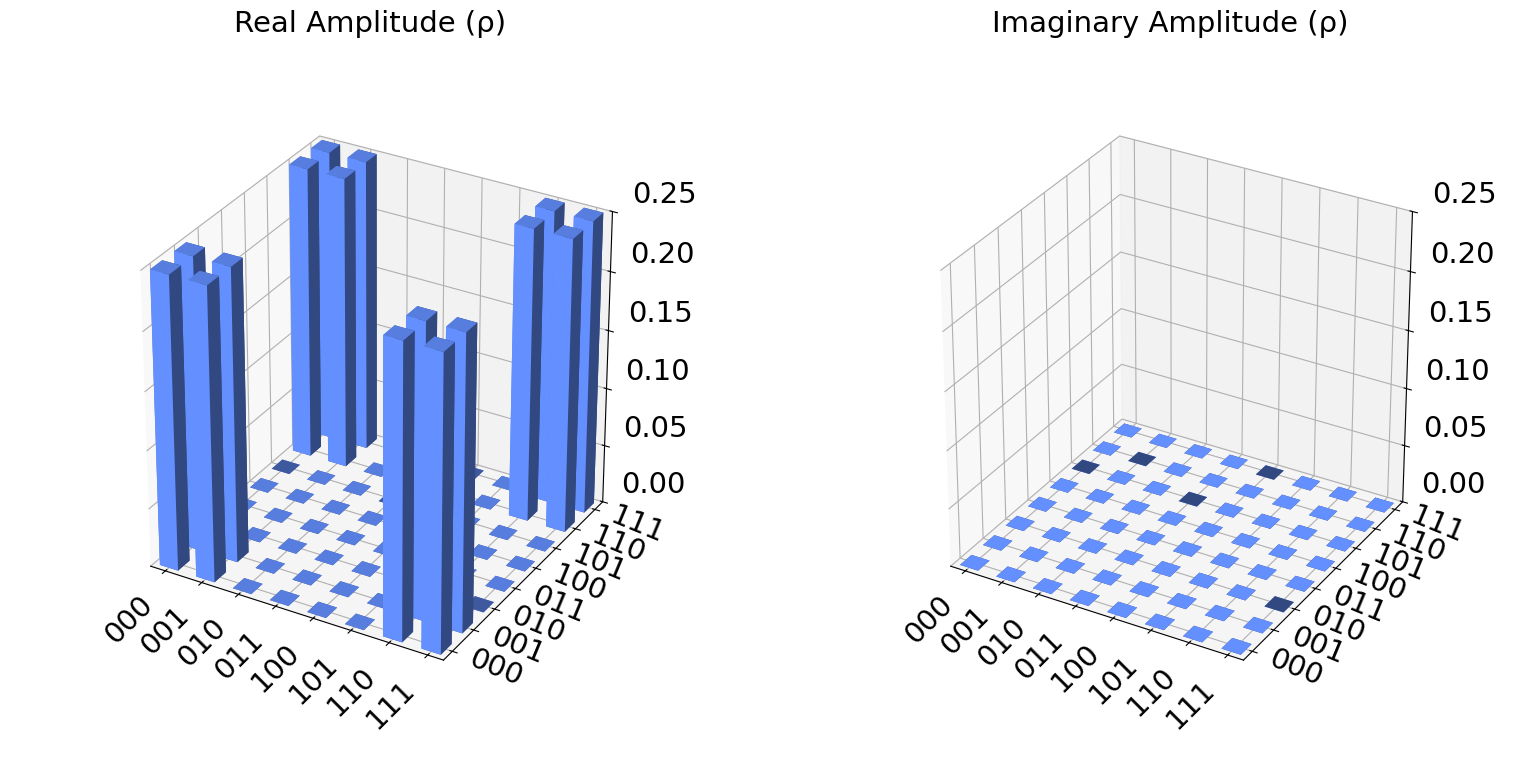

In [11]:
simulator.get_city()

**Circuit Representation**

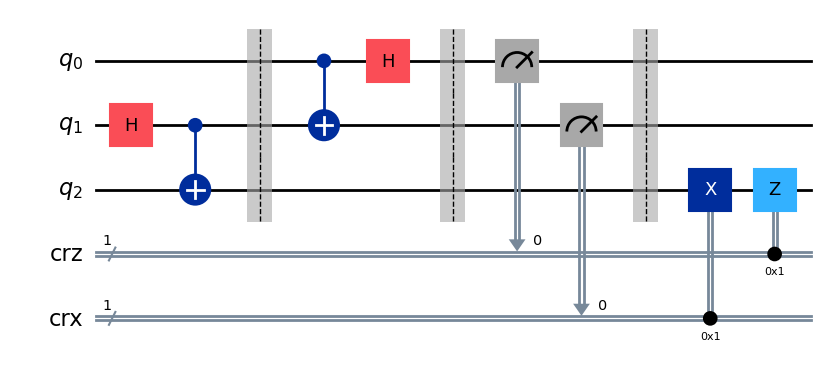

In [12]:
simulator.get_circuit()

**Hinton Representation**

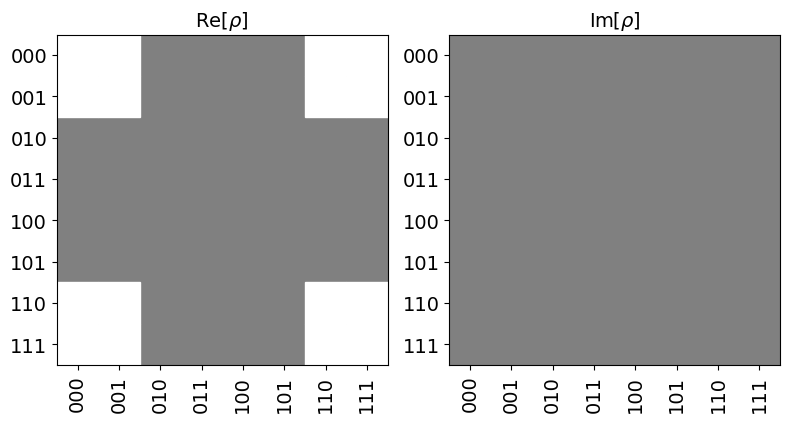

In [13]:
simulator.get_hinton()

**Paulivector Representation**

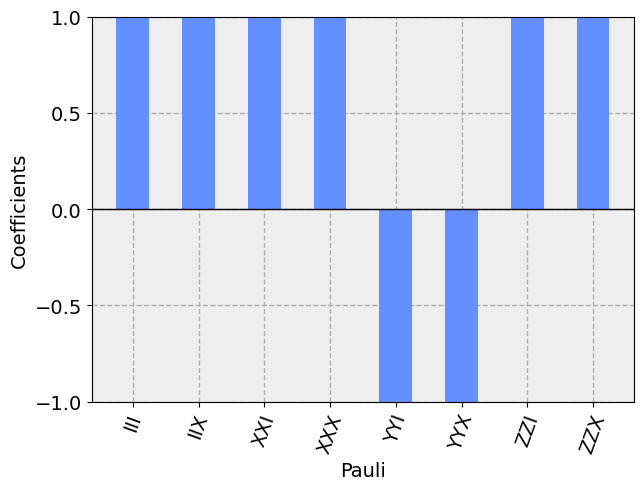

In [14]:
simulator.get_paulivec()

**Bloch sphere Representation**

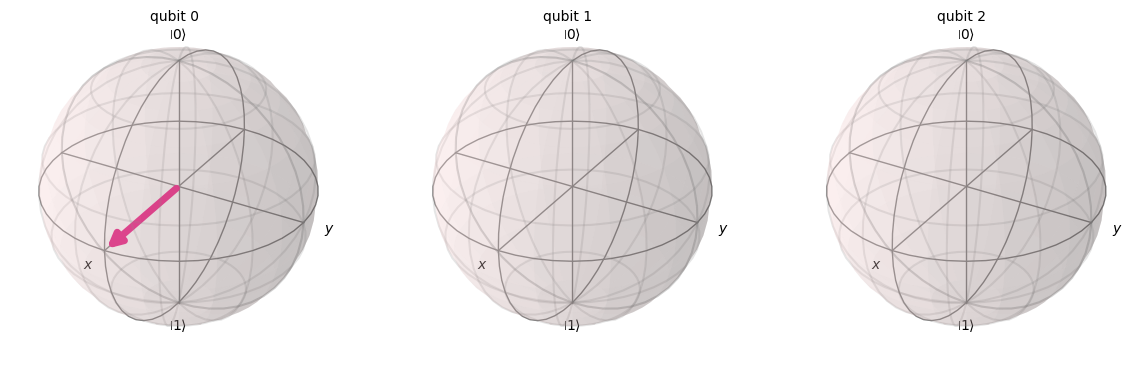

In [15]:
simulator.get_bloch()